# https://towardsdatascience.com/forecasting-exchange-rates-using-arima-in-python-f032f313fc56 taken from here the following code

In [66]:
import pandas as pd
from pandas import *
import numpy as np
import time
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as md
import numpy as np
import datetime as dt
%matplotlib inline
import warnings
import itertools
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [67]:
test= pd.read_csv('E:/University of Bremen MSc/masters_thesis/IAT_sebastian/dataset_15_april_10000_1.csv')

In [68]:
longTime=test.loc[0:,['longTime']]
longTime=longTime.as_matrix()
a=[]
date_time_array=[]
for k in longTime:
    a=np.append(a,k)
str_time=[]
correct_longtime=[]
datetime_time=[]
count=0
for b in a:
    b=int(b) # make plain integer
    str_b=str(b)
    c=str_b[-3:]
    new_str_b=str_b.replace(c, '',1)
    new_str_b_time=int(new_str_b)
    correct_longtime.append(new_str_b_time)
    now_time=datetime.datetime.fromtimestamp(new_str_b_time)
    convert_time=now_time.strftime('%Y-%m-%d %H:%M')
    str_time.append(convert_time)
# print(str_time)
test_new = test.assign(stringTime=str_time,correct_longtime=correct_longtime) # here new column in the panda dataframe for string_time has added

C:\Users\atif\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [69]:
test_new['dateTime'] =  pd.to_datetime(test_new['stringTime'], format='%Y-%m-%d %H:%M')

In [79]:
my_data=test_new.loc[200:250,['dateTime','AEDATZ_HO_V0','RWWIHOA_HWT0','AEDAHO_T9_V2']]

In [80]:
my_data_1 = my_data.set_index('dateTime')
my_data_1.head()

,AEDATZ_HO_V0,RWWIHOA_HWT0,AEDAHO_T9_V2
dateTime,,,
2019-04-11 16:54:00,33.323896,89.517397,42.040317
2019-04-11 16:53:00,35.012233,89.582214,42.105153
2019-04-11 16:52:00,36.936605,89.563579,42.097709
2019-04-11 16:51:00,37.425148,89.500385,42.127110
2019-04-11 16:50:00,36.843848,89.559533,42.001027


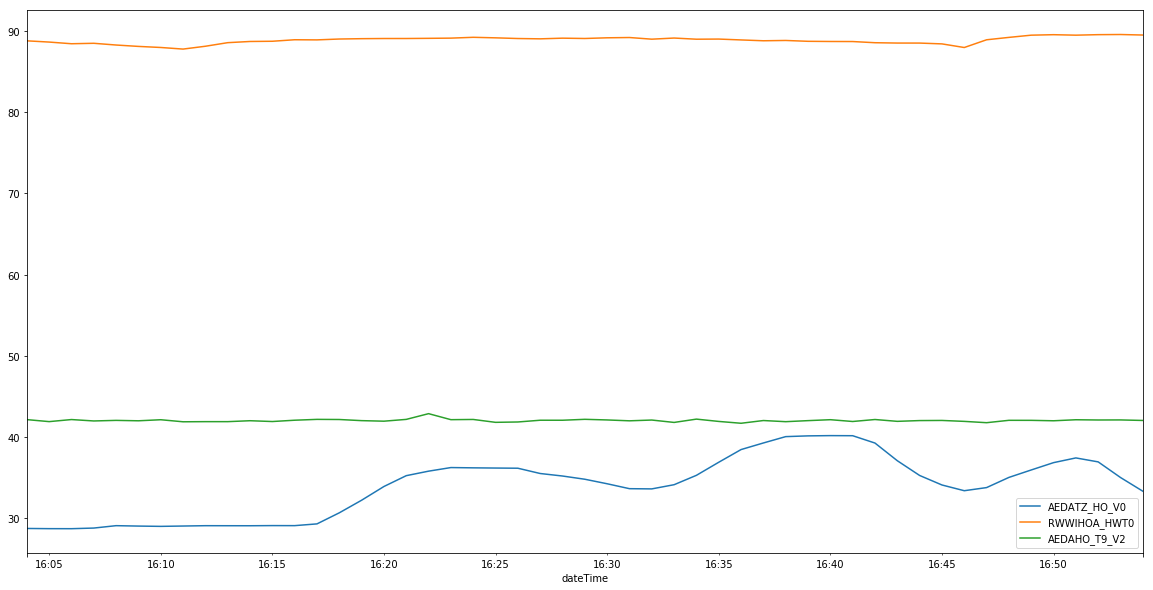

In [81]:
my_data_1.plot(figsize=(20,10),xlim=(my_data_1.index[-1],my_data_1.index[0])) # look at here, plot. don't use plt. 
# my_data_1.to_csv("E:/University of Bremen MSc/masters_thesis/IAT_sebastian/code/code_file/Arima.csv")

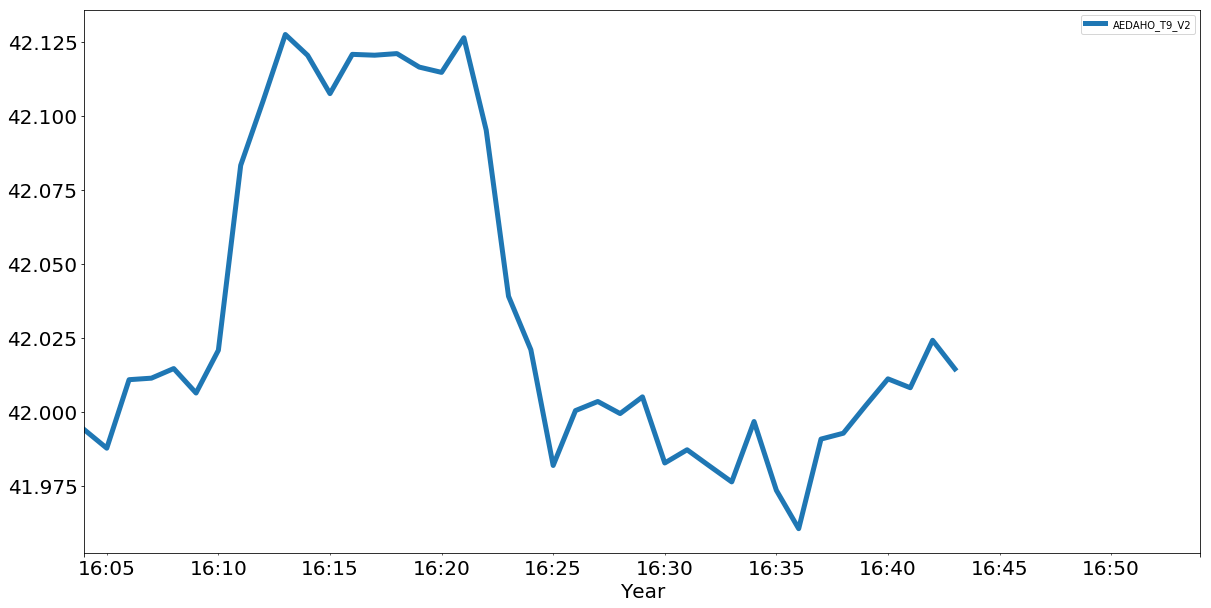

In [93]:
AEDAHO_T9_V2 = my_data_1[['AEDAHO_T9_V2']]
AEDAHO_T9_V2.rolling(12).mean().plot(figsize=(20,10),xlim=(my_data_1.index[-1],my_data_1.index[0]), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

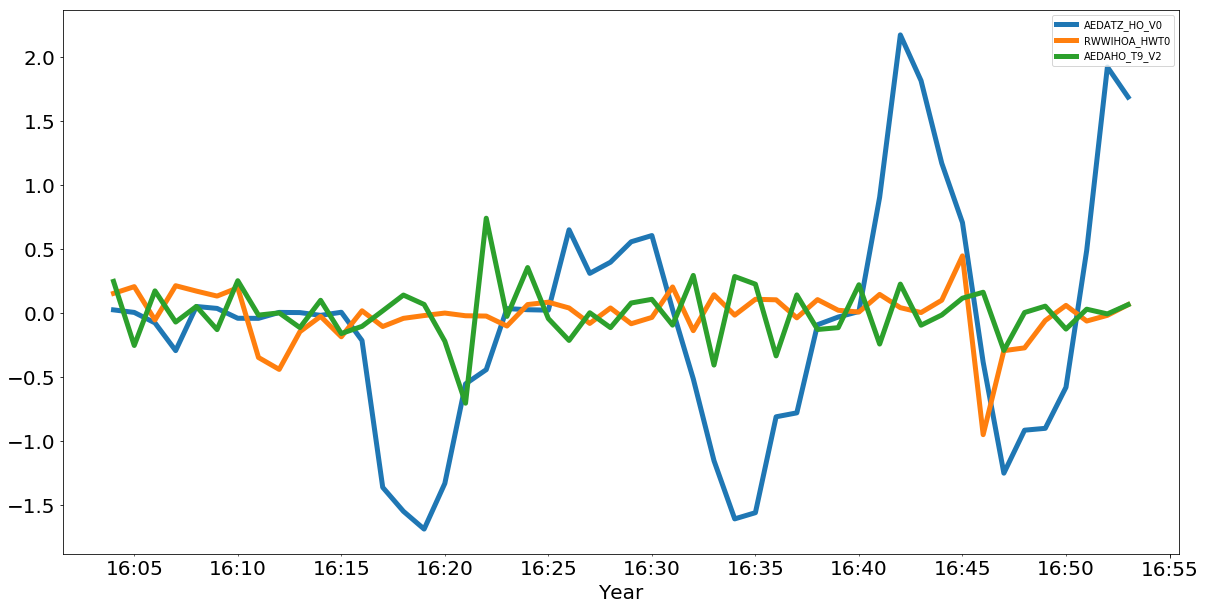

In [88]:
# print(type(AEDAHO_T8_V2))
# AEDAHO_T8_V2.head()
my_data_1.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

In [89]:
print(my_data_1.corr())
print('\n\n',my_data_1.diff().corr())

              AEDATZ_HO_V0  RWWIHOA_HWT0  AEDAHO_T9_V2
AEDATZ_HO_V0      1.000000      0.433597      0.028558
RWWIHOA_HWT0      0.433597      1.000000      0.192123
AEDAHO_T9_V2      0.028558      0.192123      1.000000


               AEDATZ_HO_V0  RWWIHOA_HWT0  AEDAHO_T9_V2
AEDATZ_HO_V0      1.000000      0.169292      0.024875
RWWIHOA_HWT0      0.169292      1.000000     -0.073821
AEDAHO_T9_V2      0.024875     -0.073821      1.000000


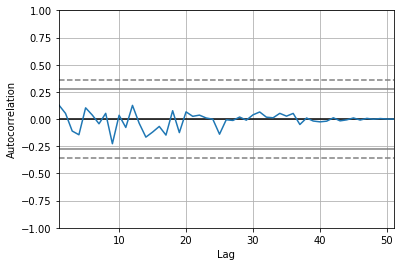

In [94]:
pd.plotting.autocorrelation_plot(AEDAHO_T9_V2)

In [87]:
# my_data_1.groupby(['AEDAHO_T9_V2']).corr()

In [75]:
# from statsmodels.tsa.arima_model import ARIMA

#Function that calls ARIMA model to fit and forecast the data
def StartARIMAForecasting(Actual, P, D, Q):
    model = ARIMA(Actual, order=(P, D, Q))
    model_fit = model.fit(disp=0)
    prediction = model_fit.forecast()[0]
    return prediction

In [56]:
actual_val=my_data_1.as_matrix()
print(actual_val.size)


4801


C:\Users\atif\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [57]:
# predicted = StartARIMAForecasting(actual_val, 1,1,0)
# #display the value
# print('Predicted=%f' % (predicted))

In [58]:
print(len(actual_val))

4801


In [59]:
NumberOfElements = len(actual_val)

#Use 70% of data as training, rest 30% to Test model
TrainingSize = int(NumberOfElements * 0.7)
TrainingData = actual_val[0:TrainingSize]
TestData = actual_val[TrainingSize:NumberOfElements]

In [60]:
Actual = [x for x in TrainingData]
Predictions = list()

In [61]:
#in a for loop, predict values using ARIMA model
for timepoint in range(len(TestData)):
    ActualValue =  TestData[timepoint]
    #forcast value
    Prediction = StartARIMAForecasting(Actual, 3,1,0)    
#     print('Actual=%f, Predicted=%f' % (ActualValue, Prediction))
    #add it in the list
    Predictions.append(Prediction)
    Actual.append(ActualValue)

Test Mean Squared Error (smaller the better fit): 4.099


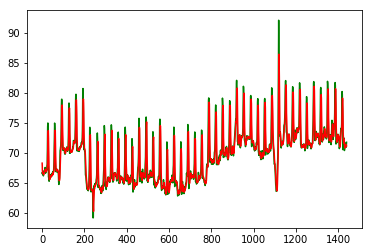

In [62]:
from sklearn.metrics import mean_squared_error

#Print MSE to see how good the model is
Error = mean_squared_error(TestData, Predictions)
print('Test Mean Squared Error (smaller the better fit): %.3f' % Error)
# plot
plt.plot(TestData,color='green')
plt.plot(Predictions, color='red')
# plt.xlim(my_data_1.index[-1],my_data_1.index[0])
plt.show()